In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math

# Loi de Cauchy

$X$ suit une loi de cauchy si elle a pour densité : $ f(x) = \displaystyle \frac{1}{\pi (1 + x^2)} $. 

Simulons une telle loi grâce à la méthode d'inversion. 

On voit facilement : $ F(x) = \displaystyle \int _{- \infty} ^x f(x) dx = \frac{1}{2} + \frac{1}{ \pi } arctan(x) \space $ et $ \space X = F^{-1}(U) $ où $ F^{-1}(x) = tan( \pi (x - \frac{1}{2})) $. 

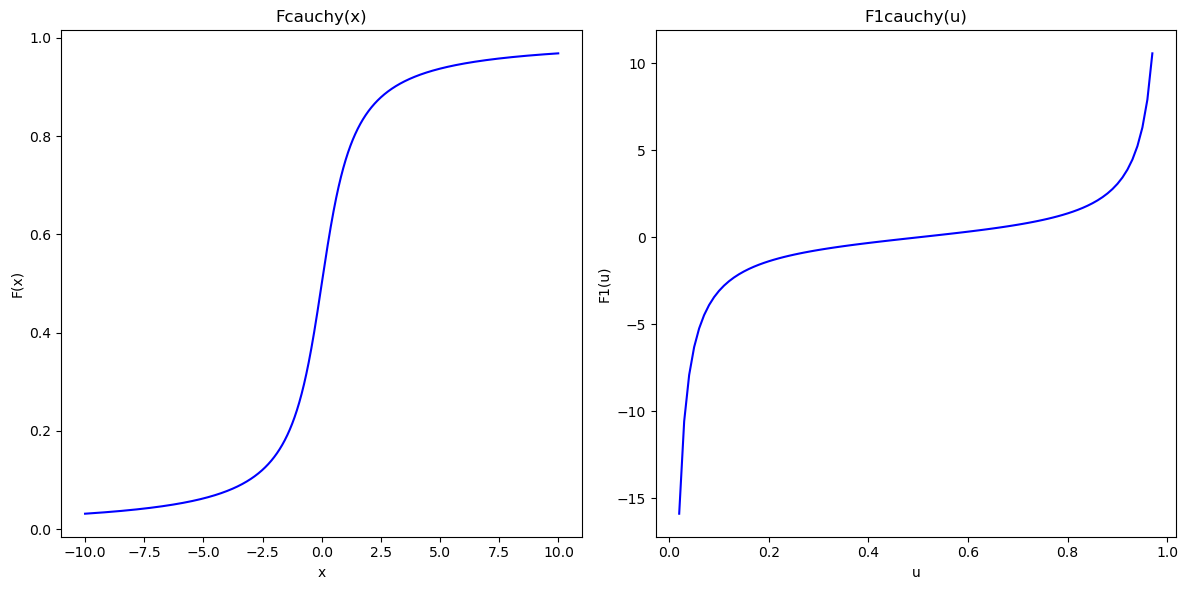

In [6]:
def Fcauchy(x): 
    return 0.5 + (1 / math.pi) * math.atan(x)

def F1cauchy(x): 
    return math.tan( math.pi * (x - 0.5))

x_vals = np.arange(-10, 10, 0.01)
u_vals = np.arange(0.02, 0.98, 0.01)

# Tracer les fonctions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_vals, [Fcauchy(x) for x in x_vals], color='blue')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Fcauchy(x)')

plt.subplot(1, 2, 2)
plt.plot(u_vals, [F1cauchy(u) for u in u_vals], color='blue')
plt.xlabel('u')
plt.ylabel('F1(u)')
plt.title('F1cauchy(u)')

plt.tight_layout()
plt.show()

# Loi de Pareto 

$X$ suit une loi de Pareto de paramètres $ (x_m , \alpha ) \in ] 0, + \infty [$  lorsque $ X = \frac{x_m}{U ^{1/ \alpha}}$ avec $U$ v.a suivant une loi uniforme sur $[0,1]$. 

$ \forall t \le x_m, P(X \le t) = P (U \ge ( \frac{x_m}{t})^{ \alpha }) = 1 - (1 - \frac{x_m}{t})^{ \alpha } $ 

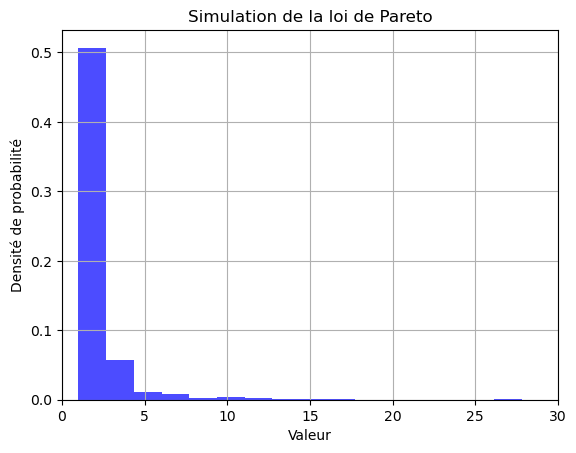

In [7]:
def simul_pareto(x_m, alpha, size):
    return x_m / np.random.rand(size) ** (1 / alpha)

pareto_data = simul_pareto(1, 2, 1000)

plt.hist(pareto_data, bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Valeur')
plt.ylabel('Densité de probabilité')
plt.title('Simulation de la loi de Pareto')
plt.xlim(0,30)
plt.grid(True)
plt.show()

# Simulation 

On considère le couple $(X,Y)$ de densité $ f(x,y) = y x^{y-1} \exp (y) \mathbb{1} _{y>0} \mathbb{1} _{0 <x < 1}$.

On vérifie facilement que $Y$ suit une loi exponentielle de paramètre 1. 

On vérifie aussi facilement que $ P (X \le t | [Y = y]) = t^{y} \exp ^{-y}$.

On utilise enfin la méthode d'inversion pour simuler le couple $ (X,Y) $ : On commence par générer $Y$ qui suit une loi exponentielle de paramètre 1, puis on génère $U$ qui suit une loi uniforme sur $[0,1]$ et on pose : $ X = \frac{ \log (U) + Y}{ \log (Y)}$.

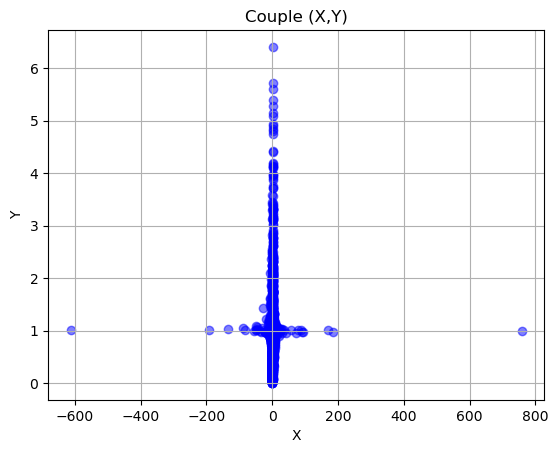

In [11]:
Y = np.random.exponential(1, size = 1000)
U = np.random.rand(1000)
X = ( np.log(U) + Y ) / np.log(Y)

# Affichage 
plt.scatter(X, Y, color='blue', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Couple (X,Y)')
plt.grid(True)
plt.show()

# Durées de simulation 

On veut générer $n = 1000$ variables exponentielles de paramètre 1.

Méthode d'inversion : $P (X \le t) = 1 - \exp ^{-t}$. 

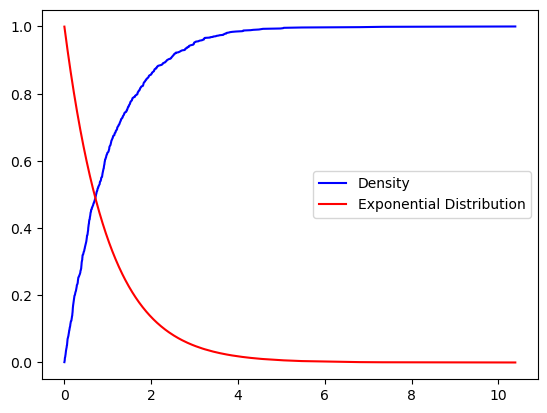

In [12]:
n = 1000
ech = -np.log(np.random.random(n))

def expo(x):
    return np.exp(-x)

plt.plot(np.sort(ech), np.arange(1, n+1) / n, color='blue', label='Density')
plt.plot(np.sort(ech), expo(np.sort(ech)), color='red', label='Exponential Distribution')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

(array([549., 237., 121.,  51.,  21.,  12.,   4.,   3.,   1.,   1.]),
 array([2.40903533e-04, 7.61350425e-01, 1.52245995e+00, 2.28356947e+00,
        3.04467899e+00, 3.80578851e+00, 4.56689803e+00, 5.32800755e+00,
        6.08911708e+00, 6.85022660e+00, 7.61133612e+00]),
 <BarContainer object of 10 artists>)

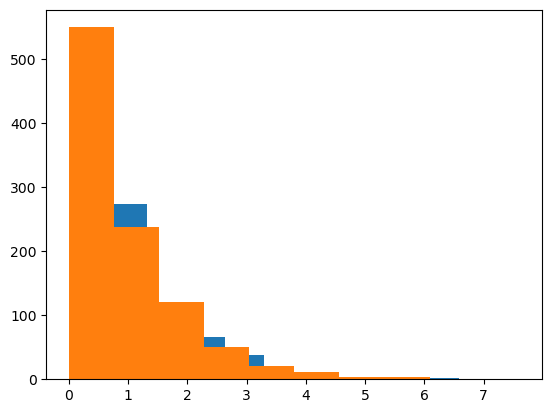

In [15]:
# Méthode d'inversion 
U = np.random.rand(1000)
X = np.log(1 / (1 - U))

# Densité théorique 
Y = np.random.exponential(1, 1000)

plt.hist(X)
plt.hist(Y)